In [2]:
# Install required packages
#nmrpy numpy matplotlib pandas

# Import required libraries
#import nmrpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import nibabel as nib

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

# Set up matplotlib for inline plotting in Jupyter
%matplotlib inline
#Having both inline and widget can cause issues, so we will use only one of them.
#%matplotlib widget


In [ ]:

#RMSREF01 = np.load("/data/MRSI/Naren2/MRSI/RMS01_V3/RMS01_REF_unshaped.npy")
#RMSREF02 = np.load("/data/MRSI/Naren2/MRSI/RMS02_V3/RMS02_REF_unshaped.npy")
#RMSREF03 = np.load("/data/MRSI/Naren2/MRSI/RMS03_V3/RMS03_REF_unshaped_redone.npy")
#RMSREF04 = np.load("/data/MRSI/Naren2/MRSI/RMS05_V3/RMS05_REF_unshaped_redone.npy")

#CONREF1 = np.load("/data/MRSI/Naren2/MRSI/Control01/Control01_REF_unshaped_redone.npy")
#CONREF2 = np.load("/data/MRSI/Naren2/MRSI/Control02/Control02_REF_unshaped_redone.npy")
#CONREF3 = np.load("/data/MRSI/Naren2/MRSI/Control03/Control03_REF_unshaped_redone.npy")
#CONREF4 = np.load("/data/MRSI/Naren2/MRSI/Control04/Control04_REF_unshaped_redone.npy")


In [ ]:
RMS01 = np.array(nib.load("/data/MRSI/Naren2/FURI2/mayomrs_aligned/ms/RMS01/redo/ms1_arr_hy_wlabels_reshaped_labelswspectra.nii").dataobj).reshape(131072, 2049)
mask = RMS01[:,-1] != 0
RMS01 = RMS01[mask]

RMSREF01 = np.array(nib.load("/data/MRSI/Naren2/MRSI/RMS01_V3/RMS01_REF_complex_FFT.nii").dataobj).reshape(131072, 4096)
RMSREF01 = RMSREF01[mask]

RMSRAW01 = np.array(nib.load("/data/MRSI/Naren2/MRSI/RMS01_V3/RMS01_complex_FFT.nii").dataobj).reshape(131072, 4096)
RMSRAW01 = RMSREF01[mask]


In [7]:
# Downsample RMSREF01 by taking every other point
RMSREF01 = RMSREF01[:, ::2]
print(f"New shape of RMSREF01: {RMSREF01.shape}")

New shape of RMSREF01: (78, 2048)


In [11]:
RMSRAW01 = np.array(nib.load("/data/MRSI/Naren2/MRSI/RMS01_V3/RMS01_complex_FFT.nii").dataobj).reshape(131072, 4096)
RMSRAW01 = RMSRAW01[mask]
RMSRAW01 = RMSRAW01[:, ::2]
print(f"New shape of RMSREF01: {RMSRAW01.shape}")

New shape of RMSREF01: (78, 2048)


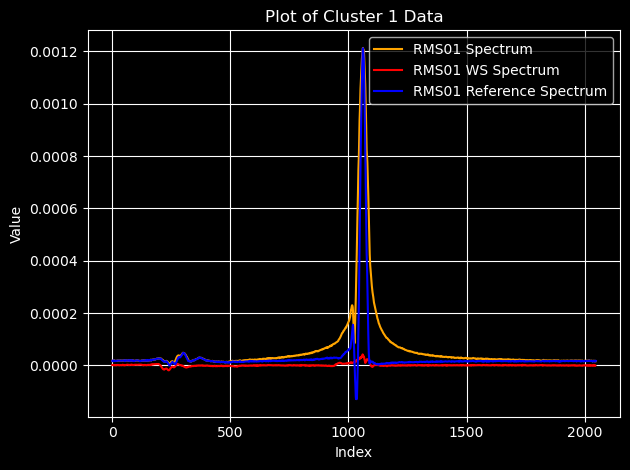

In [13]:
#RMS01 = np.load("/data/MRSI/Naren2/MRSI/RMS02_V3/RMS02_unshaped_redone.npy")
# Plot the random data
plt.plot(RMS01[1,0:-2], label='RMS01 Spectrum', color='orange')
plt.plot(RMSRAW01[1,0:-2], label='RMS01 WS Spectrum', color='red')
plt.plot(RMSREF01[1,:], label='RMS01 Reference Spectrum', color='blue')
plt.title("Plot of Cluster 1 Data")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [3]:
RMS01 = np.array(nib.load("/data/MRSI/Naren2/FURI2/mayomrs_aligned/ms/RMS01/redo/ms1_arr_hy_wlabels_reshaped_labelswspectra.nii").dataobj).reshape(131072, 2049)
mask = RMS01[:,-1] != 0
RMS01 = RMS01[mask]

RMS02 = np.array(nib.load("/data/MRSI/Naren2/FURI2/mayomrs_aligned/ms/RMS02/redo/ms2_arr_hy_wlabels_reshaped_labelswspectra.nii").dataobj).reshape(131072, 2049)
mask = RMS02[:,-1] != 0
RMS02 = RMS02[mask]

RMS03 = np.array(nib.load("/data/MRSI/Naren2/FURI2/mayomrs_aligned/ms/RMS03/redo/ms3_arr_hy_wlabels_reshaped_labelswspectra.nii").dataobj).reshape(131072, 2049)
mask = RMS03[:,-1] != 0
RMS03 = RMS03[mask]

RMS04 = np.array(nib.load("/data/MRSI/Naren2/FURI2/mayomrs_aligned/ms/RMS05/redo/ms5_arr_hy_wlabels_reshaped_labelswspectra.nii").dataobj).reshape(131072, 2049)
mask = RMS04[:,-1] != 0
RMS04 = RMS04[mask]


In [36]:
# Concatenate the RMS arrays
ALLRMS = np.concatenate([RMS01, RMS02, RMS03, RMS04], axis=0)
print(f"Shape of concatenated array: {ALLRMS.shape}")

Shape of concatenated array: (162, 2049)


In [38]:
# Making arrays of each cluster to plot separately
mask = ALLRMS[:,-1] == 1
CLUST1 = ALLRMS[mask]
CLUST1 = CLUST1[:, :-1]  # Remove the last column which is the label
mask = ALLRMS[:,-1] == 2
CLUST2 = ALLRMS[mask]
CLUST2 = CLUST2[:, :-1]  # Remove the last column which is the label
mask = ALLRMS[:,-1] == 3
CLUST3 = ALLRMS[mask]
CLUST3 = CLUST3[:, :-1]  # Remove the last column which is the label

In [43]:
print(f"Shape of concatenated array: {CLUST1.shape}")
SPECT1 = np.mean(CLUST1, axis=0)
SPECT2 = np.mean(CLUST2, axis=0)
SPECT3 = np.mean(CLUST3, axis=0)

Shape of concatenated array: (86, 2048)


Shape is 32X64X64X2049 with element 2049 as the label from cPCA

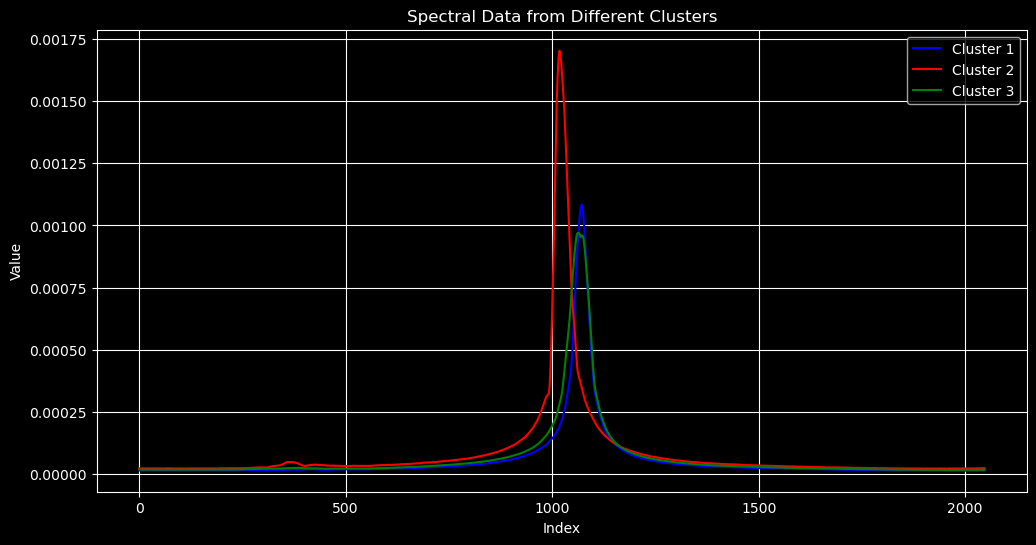

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(SPECT1, label='Cluster 1', color='blue')
plt.plot(SPECT2, label='Cluster 2', color='red')
plt.plot(SPECT3, label='Cluster 3', color='green')
plt.title('Spectral Data from Different Clusters')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

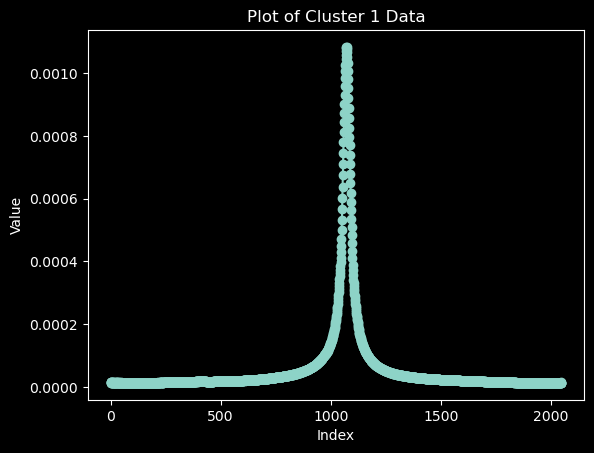

In [44]:
#RMS01 = np.load("/data/MRSI/Naren2/MRSI/RMS02_V3/RMS02_unshaped_redone.npy")
# Plot the random data
plt.plot(SPECT1, marker='o')
plt.title("Plot of Cluster 1 Data")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()